In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [43]:
df = pd.read_csv('weblogs.csv')
df.head()

,ID,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,obSnwGoBCue8G08E_WCX,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,nLSnwGoBCue8G08E_WCX,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,ErSowGoBCue8G08ECmHa,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,E7SowGoBCue8G08ECmHa,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,FbSowGoBCue8G08ECmHa,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1


Note: 

- STANDARD_DEVIATION --> 52945 non-null count while others have 67352 non-null count

- SF_REFERRERE --> 52945 non-null count while others have 67352 non-null count

- SF_FILETYPE --> 52945 non-null count while others have 67352 non-null count

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67352 entries, 0 to 67351
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  67352 non-null  object 
 1   NUMBER_OF_REQUESTS  67352 non-null  int64  
 2   TOTAL_DURATION      67352 non-null  int64  
 3   AVERAGE_TIME        67352 non-null  float64
 4   STANDARD_DEVIATION  52945 non-null  float64
 5   REPEATED_REQUESTS   67352 non-null  float64
 6   HTTP_RESPONSE_2XX   67352 non-null  float64
 7   HTTP_RESPONSE_3XX   67352 non-null  float64
 8   HTTP_RESPONSE_4XX   67352 non-null  float64
 9   HTTP_RESPONSE_5XX   67352 non-null  float64
 10  GET_METHOD          67352 non-null  float64
 11  POST_METHOD         67352 non-null  float64
 12  HEAD_METHOD         67352 non-null  float64
 13  OTHER_METHOD        67352 non-null  float64
 14  NIGHT               67352 non-null  float64
 15  UNASSIGNED          67352 non-null  float64
 16  IMAG

UNASSIGNED: Requests with non-assigned referrers are HTTP requests that are made without a referrer header and are often generated programmatically for various purposes such as web scraping, testing, or monitoring.

##### DATA CLEANING

In [45]:
df = df.drop(['NIGHT', 'ID'], axis=1)

In [46]:
df['OTHER_METHOD'].value_counts()

0.000000    67341
1.000000        4
0.064516        1
0.084746        1
0.032787        1
0.053571        1
0.030928        1
0.033333        1
0.028571        1
Name: OTHER_METHOD, dtype: int64

In [47]:
df = df.drop('OTHER_METHOD', axis=1)

In [48]:
column_counts = df.count()
column_counts

NUMBER_OF_REQUESTS    67352
TOTAL_DURATION        67352
AVERAGE_TIME          67352
STANDARD_DEVIATION    52945
REPEATED_REQUESTS     67352
HTTP_RESPONSE_2XX     67352
HTTP_RESPONSE_3XX     67352
HTTP_RESPONSE_4XX     67352
HTTP_RESPONSE_5XX     67352
GET_METHOD            67352
POST_METHOD           67352
HEAD_METHOD           67352
UNASSIGNED            67352
IMAGES                67352
TOTAL_HTML            67352
HTML_TO_IMAGE         67352
HTML_TO_CSS           67352
HTML_TO_JS            67352
WIDTH                 67352
DEPTH                 67352
STD_DEPTH             67352
CONSECUTIVE           67352
DATA                  67352
PPI                   67352
SF_REFERRER           52945
SF_FILETYPE           52945
MAX_BARRAGE           67352
PENALTY               67352
ROBOT                 67352
dtype: int64

##### DATA OPSPLITSEN IN X EN Y

In [49]:
# data opsplitsen in X en y
X = df.loc[:, df.columns != 'ROBOT']
y = df['ROBOT']

In [50]:
print(X.shape, y.shape)

(67352, 28) (67352,)


##### TRAINING EN TEST DATA

In [51]:
# training en test data opsplitsen
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53881, 28) (13471, 28) (53881,) (13471,)


##### NaN WAARDEN OPVULLEN

In [53]:
# NUMERIC DATA NaN vervangen door nullen
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

#### NUMERIEKE DATA STANDAADISEREN

In [54]:
# numeric data standaardiseren
numeric_cols = X.select_dtypes(['int64', 'float64']).columns
numeric_cols

Index(['NUMBER_OF_REQUESTS', 'TOTAL_DURATION', 'AVERAGE_TIME',
       'STANDARD_DEVIATION', 'REPEATED_REQUESTS', 'HTTP_RESPONSE_2XX',
       'HTTP_RESPONSE_3XX', 'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX',
       'GET_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'UNASSIGNED', 'IMAGES',
       'TOTAL_HTML', 'HTML_TO_IMAGE', 'HTML_TO_CSS', 'HTML_TO_JS', 'WIDTH',
       'DEPTH', 'STD_DEPTH', 'CONSECUTIVE', 'DATA', 'PPI', 'SF_REFERRER',
       'SF_FILETYPE', 'MAX_BARRAGE', 'PENALTY'],
      dtype='object')

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols]

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,GET_METHOD,...,WIDTH,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY
0,0.110077,-0.016955,-0.172282,-0.428530,-0.52470,-0.949658,2.031770,-0.119117,-0.044044,0.127974,...,-0.055814,-0.565587,-0.313308,-0.918823,0.636457,0.598414,-1.070996,-0.723905,-0.697260,-0.271244
1,1.700414,12.802016,1.744076,2.447709,-0.52470,0.155591,-0.138971,-0.088221,-0.044044,0.127974,...,1.932869,0.775613,-0.568455,0.239006,0.902944,-0.032682,1.175795,0.305629,-0.543951,-0.271244
2,-0.265500,-0.044825,-0.048446,0.523006,-0.52470,0.181114,-0.138971,-0.119117,-0.044044,0.127974,...,-0.251312,-1.236188,-1.138600,-1.280201,-0.140715,-0.032682,1.568186,2.470395,-0.646157,-0.271244
3,-0.189211,-0.089243,-0.219856,-0.436352,-0.52470,0.181114,-0.138971,-0.119117,-0.044044,0.127974,...,-0.163675,-1.236188,-1.138600,1.651156,-0.142532,-0.032682,-0.918945,-0.952887,-0.492848,-0.271244
4,54.469067,9.980770,-0.165156,-0.253130,-0.52335,0.153383,-0.094915,-0.116802,-0.031801,0.127974,...,60.582181,-0.565587,-0.883109,2.123385,42.766394,-0.032682,-1.070996,-1.453593,-0.697260,-0.271244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67347,-0.253763,-0.090363,-0.221727,-0.444882,-0.52470,0.181114,-0.138971,-0.119117,-0.044044,0.127974,...,-0.237829,0.775613,0.750912,-0.440529,-0.098075,-0.032682,1.238288,0.209913,-0.748363,-0.271244
67348,-0.347658,-0.090612,-0.222554,NaN,-0.52470,0.181114,-0.138971,-0.119117,-0.044044,0.127974,...,-0.345690,-0.565587,-1.138600,-1.280201,-0.159470,-0.032682,NaN,NaN,-0.748363,-0.271244
67349,-0.347658,-0.090612,-0.222554,NaN,-0.52470,0.181114,-0.138971,-0.119117,-0.044044,0.127974,...,-0.345690,-1.236188,-1.138600,-1.280201,-0.165568,-0.032682,NaN,NaN,-0.748363,-0.271244
67350,-0.347658,-0.090612,-0.222554,NaN,-0.52470,0.181114,-0.138971,-0.119117,-0.044044,0.127974,...,-0.345690,-0.565587,-1.138600,-1.280201,-0.162189,-0.032682,NaN,NaN,-0.748363,-0.271244


##### MODEL TRAINEN

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [57]:
grid_search.best_score_

0.9787123213882492

In [58]:
# model opslaan
import pickle
filename = './modellen/random_forest_classifier_27_2_23.sav'
pickle.dump(grid_search, open(filename, 'wb'))

##### CROSS VALIDATION AND CONFUSION MATRIX

In [59]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rf, X_test, y_test, cv=3)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm

array([[10630,   155],
       [  222,  2464]], dtype=int64)

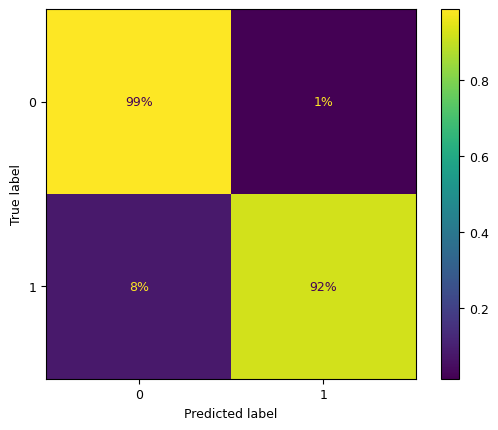

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format='.0%')
plt.show()

##### PRECISION, RECALL, F1 SCORE

In [64]:
# precision, recall, f1-score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10785
           1       0.94      0.92      0.93      2686

    accuracy                           0.97     13471
   macro avg       0.96      0.95      0.96     13471
weighted avg       0.97      0.97      0.97     13471



##### ROC CURVE EN AUC

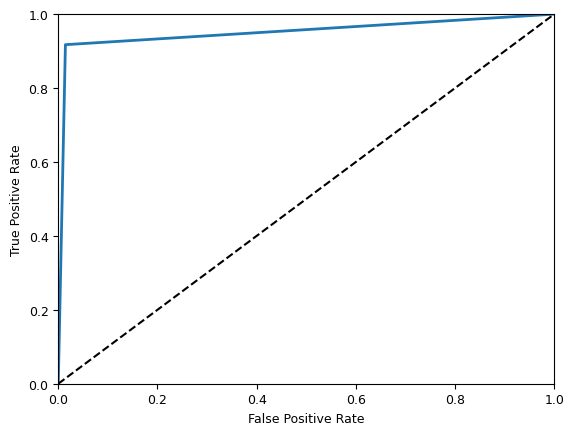

In [65]:
# ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [66]:
# roc_auc_score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_pred)

0.951488702732726

##### EVALUATIE MET TEST DATA

In [62]:
clf = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25)

In [63]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9801796451636849


In [67]:
# model opslaan
filename = './modellen/random_forest_classifier_final_27_2_23.sav'
pickle.dump(clf, open(filename, 'wb'))